## **IMPORTS**

In [ ]:
import pandas as pd
import os
import pickle
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

## **MOUNT DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/bda/

/content/drive/My Drive/bda


## **LOAD MERGED DATASET FROM STEP-1**

In [ ]:
comments = pd.read_csv('/content/drive/My Drive/bda/educational_comments.csv',encoding='utf8',error_bad_lines=False)

In [ ]:
comments.head()

,Unnamed: 0,Unnamed: 0.1,video_id,title,channel_title,category_id,tags,views,likes_x,dislikes,comment_total,thumbnail_link,date,comment_text,likes_y,replies,pol
0,0,0,ql0Op1VcELw,What's Actually the Plane of the Future,Wendover Productions,27,plane|of|the|future|aviation|airplane|aircraft...,602127,19575,658,2510,https://i.ytimg.com/vi/ql0Op1VcELw/default.jpg,13.09,Hey I hope you enjoy this new video! Some 370 ...,728,77,1.0
1,1,1,ql0Op1VcELw,What's Actually the Plane of the Future,Wendover Productions,27,plane|of|the|future|aviation|airplane|aircraft...,602127,19575,658,2510,https://i.ytimg.com/vi/ql0Op1VcELw/default.jpg,13.09,What do the 7s refer to?,0,0,0.0
2,2,2,ql0Op1VcELw,What's Actually the Plane of the Future,Wendover Productions,27,plane|of|the|future|aviation|airplane|aircraft...,602127,19575,658,2510,https://i.ytimg.com/vi/ql0Op1VcELw/default.jpg,13.09,"As an aircraft tech, Boeing products are super...",0,0,1.0
3,3,3,ql0Op1VcELw,What's Actually the Plane of the Future,Wendover Productions,27,plane|of|the|future|aviation|airplane|aircraft...,602127,19575,658,2510,https://i.ytimg.com/vi/ql0Op1VcELw/default.jpg,13.09,Hydrogen Aircraft and Electric Solar Power. Th...,0,0,1.0
4,4,4,ql0Op1VcELw,What's Actually the Plane of the Future,Wendover Productions,27,plane|of|the|future|aviation|airplane|aircraft...,602127,19575,658,2510,https://i.ytimg.com/vi/ql0Op1VcELw/default.jpg,13.09,Lmao what about the bombardier CS300? It's not...,0,0,1.0


In [ ]:
comments.shape

(242152, 17)

In [ ]:
comments.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'video_id', 'title', 'channel_title',
       'category_id', 'tags', 'views', 'likes_x', 'dislikes', 'comment_total',
       'thumbnail_link', 'date', 'comment_text', 'likes_y', 'replies', 'pol'],
      dtype='object')

## **FIND POLARITY USING textblob - SPLITTING THE COMMENTS INTO POSITIVE, NEUTRAL, NEGATIVE**

In [ ]:
pol=[] 
for i in comments.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [ ]:
comments['pol']=pol
comments['pol'][comments.pol==0]= 0
comments['pol'][comments.pol > 0]= 1
comments['pol'][comments.pol < 0]= -1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
comments.head()

,Unnamed: 0,video_id,title,channel_title,category_id,tags,views,likes_x,dislikes,comment_total,thumbnail_link,date,comment_text,likes_y,replies,pol
0,0,ql0Op1VcELw,What's Actually the Plane of the Future,Wendover Productions,27,plane|of|the|future|aviation|airplane|aircraft...,602127,19575,658,2510,https://i.ytimg.com/vi/ql0Op1VcELw/default.jpg,13.09,Hey I hope you enjoy this new video! Some 370 ...,728,77,1.0
1,1,ql0Op1VcELw,What's Actually the Plane of the Future,Wendover Productions,27,plane|of|the|future|aviation|airplane|aircraft...,602127,19575,658,2510,https://i.ytimg.com/vi/ql0Op1VcELw/default.jpg,13.09,What do the 7s refer to?,0,0,0.0
2,2,ql0Op1VcELw,What's Actually the Plane of the Future,Wendover Productions,27,plane|of|the|future|aviation|airplane|aircraft...,602127,19575,658,2510,https://i.ytimg.com/vi/ql0Op1VcELw/default.jpg,13.09,"As an aircraft tech, Boeing products are super...",0,0,1.0
3,3,ql0Op1VcELw,What's Actually the Plane of the Future,Wendover Productions,27,plane|of|the|future|aviation|airplane|aircraft...,602127,19575,658,2510,https://i.ytimg.com/vi/ql0Op1VcELw/default.jpg,13.09,Hydrogen Aircraft and Electric Solar Power. Th...,0,0,1.0
4,4,ql0Op1VcELw,What's Actually the Plane of the Future,Wendover Productions,27,plane|of|the|future|aviation|airplane|aircraft...,602127,19575,658,2510,https://i.ytimg.com/vi/ql0Op1VcELw/default.jpg,13.09,Lmao what about the bombardier CS300? It's not...,0,0,1.0


## **VISUALIZING WORD CLOUDS FOR POSITIVE AND NEGATIVE COMMENTS**

(-0.5, 999.5, 499.5, -0.5)

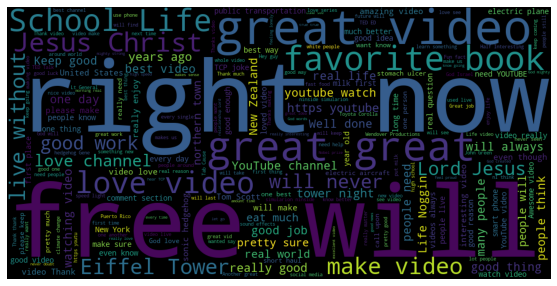

In [ ]:
df_positive = comments[comments.pol==1]
k= (' '.join(df_positive['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

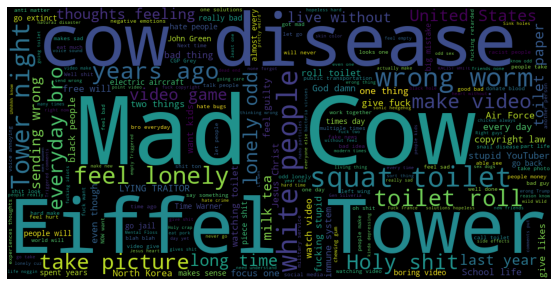

In [ ]:
df_negative = comments[comments.pol==-1]
k= (' '.join(df_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## **VISUALIZING WORD CLOUD FOR THE TITLES(Tags) OF TRENDING VIDEOS**

(-0.5, 999.5, 499.5, -0.5)

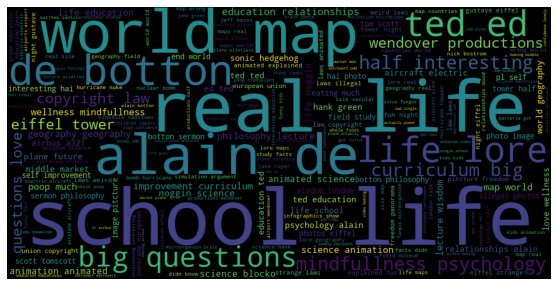

In [ ]:
tags = comments['tags'].map(lambda k: k.lower().split('|')).values 
k= (' '.join(comments['tags']))  
wordcloud = WordCloud(width = 1000, height = 500).generate((' '.join(k.lower().split('|'))))# word cloud


plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
comments.to_csv("educational_comments.csv")

## **REGRESSION PLOT - CORRELATION BETWEEN VIEWS AND LIKES**

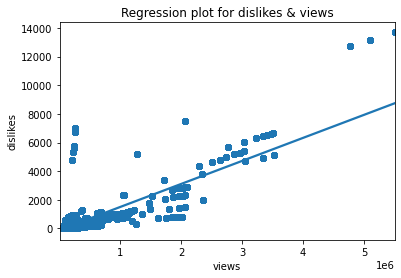

In [ ]:
import seaborn as sns
sns.regplot(data=comments,x='views',y='dislikes');
plt.title("Regression plot for dislikes & views");

## **CREATING A NAIVE BAYES CLASSIFIER**

In [ ]:
np.unique(comments.pol)

array([-1.,  0.,  1.])

In [ ]:
comments.pol.value_counts()

 1.0    99023
 0.0    96739
-1.0    46390
Name: pol, dtype: int64

In [ ]:
comments = comments.drop(['likes_y','replies','thumbnail_link','Unnamed: 0.1'],axis=1)

In [ ]:
comments.dtypes

Unnamed: 0         int64
video_id          object
title             object
channel_title     object
category_id        int64
tags              object
views              int64
likes_x            int64
dislikes           int64
comment_total      int64
date             float64
comment_text      object
pol              float64
dtype: object

In [ ]:
df = comments.dropna()

In [ ]:
len(df)

242131

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['comment_text'])

In [ ]:
df['pol'][df.pol > 0]= 2
df['pol'][df.pol==0]= 1
df['pol'][df.pol < 0]= 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['pol'], test_size=0.25, random_state=5)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [ ]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

88.98%


In [ ]:
sample_comments = ['A great explanation','very clean and simple','worst video ever','very informative','i hate this man']
sample_y = [2,2,0,2,0]
trans = cv.transform(sample_comments)

In [ ]:
sample_pred = MNB.predict(trans)

In [ ]:
labels = []
for i in range(0,len(sample_pred)):
  if sample_pred[i]==0:
    labels.append('negative')
  elif sample_pred[i]==2:
    labels.append('positive')
  else:
    labels.append('neutral')

In [ ]:
print('Comment\t\t\t\tPredicted Sentiment')
for i in range(0,len(labels)):
  print(sample_comments[i],'\t\t\t',labels[i])

Comment				Predicted Sentiment
A great explanation 			 positive
very clean and simple 			 positive
worst video ever 			 negative
very informative 			 positive
i hate this man 			 negative


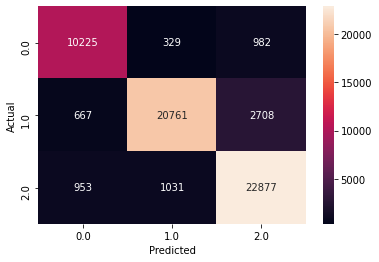

In [ ]:
confusion_matrix = pd.crosstab(Y_test, predicted, rownames=['Actual'], colnames=['Predicted'],)
sn.heatmap(confusion_matrix, annot=True,fmt='g')
plt.show()